# Ten year Coronary Risk prediction

In [1]:
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2, chi2_contingency
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\Manikantha\Desktop\kaggle\Logistic Regression\Coronary_prediction\coronary_prediction.csv')

In [4]:
df.shape

(4238, 16)

In [5]:
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Gender

In [9]:
df.Gender.describe()

count    4238.000000
mean        0.429212
std         0.495022
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64

In [10]:
df.Gender.isnull().sum()

0

Text(0.5, 1.0, 'Gender - count')

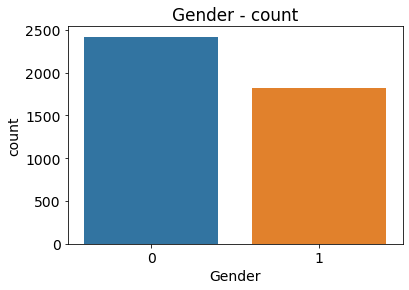

In [11]:
sns.countplot(x = 'Gender', data = df)
plt.title('Gender - count')

In [12]:
ct_Gender = pd.crosstab(df.Gender, df.TenYearCHD)
ct_Gender

TenYearCHD,0,1
Gender,,
0,2118,301
1,1476,343


In [13]:
chi2_contingency(ct_Gender, correction = False)

(33.13876412178594,
 8.581080129462392e-09,
 1,
 array([[2051.41245871,  367.58754129],
        [1542.58754129,  276.41245871]]))

Text(0.5, 1.0, 'Gender VS  TenYearCHD')

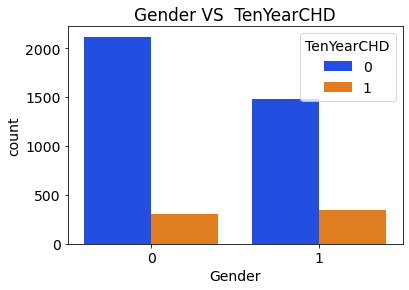

In [14]:
sns.countplot(df.Gender, hue = df.TenYearCHD, palette = 'bright')
plt.title('Gender VS  TenYearCHD')

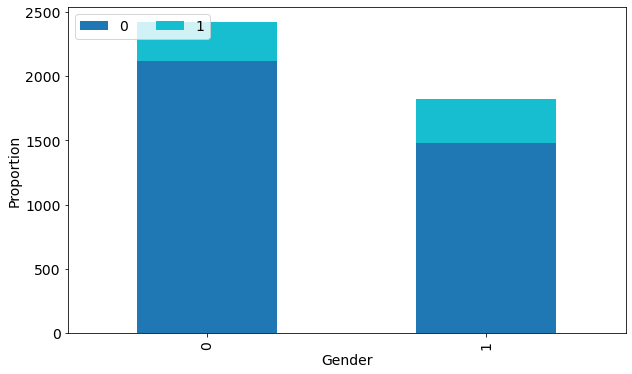

In [15]:
ct_Gender.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.show()
#good predictor

# age

In [16]:
df.age.describe()

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

Skewness: 0.228146
Kurtosis: -0.989636


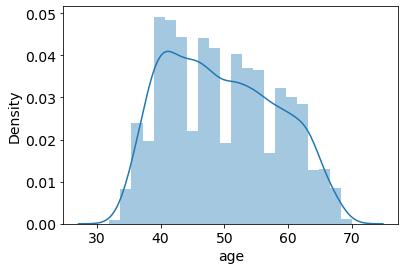

In [17]:
sns.distplot(df['age']);

print("Skewness: %f" % df['age'].skew())
print("Kurtosis: %f" % df['age'].kurt())
#Age Data is normaly Distributed skewness and kurtosis are also in the normality range.

<AxesSubplot:xlabel='age'>

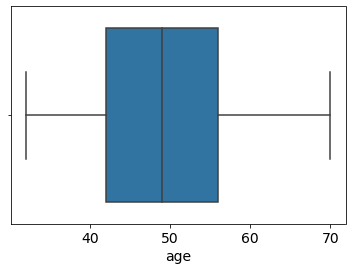

In [18]:
sns.boxplot(df.age)

In [19]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ age', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#6.845009e-50 ie p_value is <0.05; Ho Reject; Good Predictor

              df      sum_sq    mean_sq          F        PR(>F)
age          1.0   27.711250  27.711250  226.42483  6.845009e-50
Residual  4236.0  518.427494   0.122386        NaN           NaN


# education-Highest education received

In [20]:
df.education.describe()

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [21]:
df.education.isnull().sum()

105

In [22]:
df.education.fillna(df.education.mode()[0],inplace=True)

In [23]:
df.education.isnull().sum()

0

Text(0.5, 1.0, 'education - count')

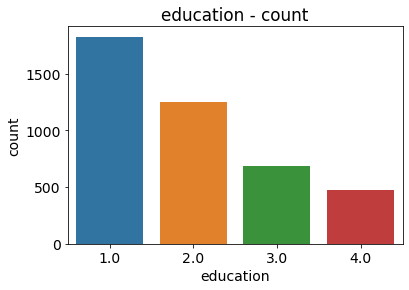

In [24]:
sns.countplot(x = 'education', data = df)
plt.title('education - count')

In [25]:
ct_Education = pd.crosstab(df.education, df.TenYearCHD)
ct_Education

TenYearCHD,0,1
education,,
1.0,1486,339
2.0,1106,147
3.0,599,88
4.0,403,70


In [26]:
chi2_contingency(ct_Education, correction = False)

(30.93552881168504,
 8.770368701361081e-07,
 3,
 array([[1547.67579047,  277.32420953],
        [1062.59603587,  190.40396413],
        [ 582.60453044,  104.39546956],
        [ 401.12364323,   71.87635677]]))

Text(0.5, 1.0, 'Education VS  TenYearCHD')

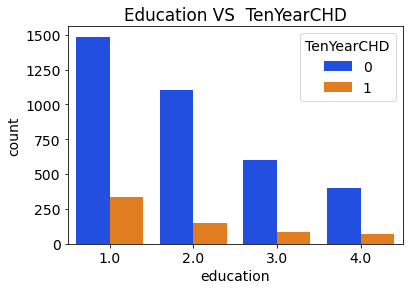

In [27]:
sns.countplot(df.education, hue = df.TenYearCHD, palette = 'bright')
plt.title('Education VS  TenYearCHD')

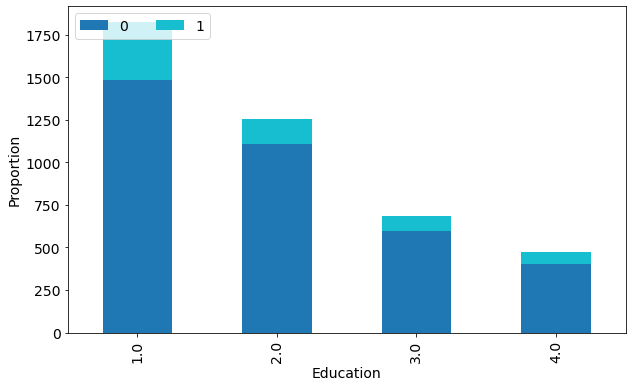

In [28]:
ct_Education.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Education")
plt.ylabel("Proportion")
plt.show()
#good predictor

In [29]:
#Hypothesis Testing
#if we consider education as ordinal data
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ education', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#0.000583 ie p_value is <0.05; Ho Reject; Good Predictor

               df      sum_sq   mean_sq          F    PR(>F)
education     1.0    1.523254  1.523254  11.847819  0.000583
Residual   4236.0  544.615490  0.128568        NaN       NaN


# currentSmoker

In [30]:
df.currentSmoker.describe()

count    4238.000000
mean        0.494101
std         0.500024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: currentSmoker, dtype: float64

In [31]:
df.currentSmoker.isnull().sum()

0

Text(0.5, 1.0, 'currentSmoker - count')

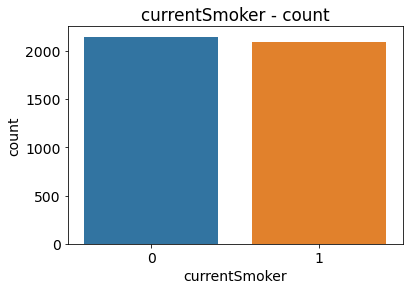

In [32]:
sns.countplot(x = 'currentSmoker', data = df)
plt.title('currentSmoker - count')

In [33]:
ct_currentSmoker = pd.crosstab(df.currentSmoker, df.TenYearCHD)
ct_currentSmoker

TenYearCHD,0,1
currentSmoker,,
0,1833,311
1,1761,333


In [34]:
#bad predictor
chi2_contingency(ct_currentSmoker, correction = False)

(1.6042792098599596,
 0.20529783701529147,
 1,
 array([[1818.20103823,  325.79896177],
        [1775.79896177,  318.20103823]]))

p value is greater than 0.05 accept the null.i.e.There is no difference

# cigsPerDay

In [35]:
df.cigsPerDay.describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [36]:
df.cigsPerDay.isnull().sum()

29

In [37]:
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace=True)

In [38]:
df.cigsPerDay.isnull().sum()

0

Skewness: 1.257472
Kurtosis: 1.047748


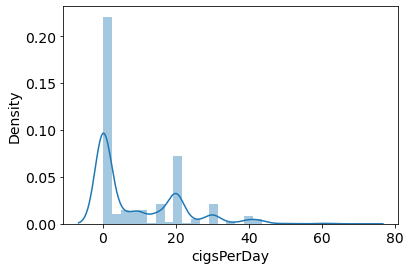

In [39]:
sns.distplot(df['cigsPerDay']);

print("Skewness: %f" % df['cigsPerDay'].skew())
print("Kurtosis: %f" % df['cigsPerDay'].kurt())
#cigsPerDay Data is normaly Distributed skewness and kurtosis are also in the normality range.

<AxesSubplot:xlabel='cigsPerDay'>

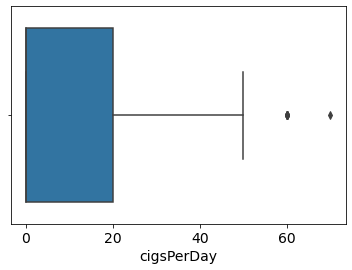

In [40]:
sns.boxplot(df.cigsPerDay)

In [41]:
IQR=df.cigsPerDay.quantile(0.75)-df.cigsPerDay.quantile(0.25)
print(IQR)

20.0


In [42]:
upper_bridge=df['cigsPerDay'].quantile(0.75)+IQR*1.5
print(upper_bridge)

50.0


In [43]:
df.loc[df['cigsPerDay']>=50.0,'cigsPerDay']=50.0

<AxesSubplot:xlabel='cigsPerDay'>

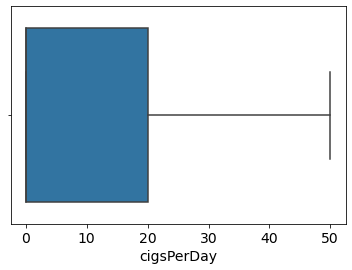

In [44]:
sns.boxplot(df.cigsPerDay)

In [45]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ cigsPerDay', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#0.000108 ie p_value is <0.05; Ho Reject; Good Predictor

                df      sum_sq   mean_sq          F    PR(>F)
cigsPerDay     1.0    1.930338  1.930338  15.025334  0.000108
Residual    4236.0  544.208406  0.128472        NaN       NaN


# BPMeds-State if patient on Blood pressure medication

In [46]:
df.BPMeds.describe()

count    4185.000000
mean        0.029630
std         0.169584
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [47]:
df.BPMeds.isnull().sum()

53

In [48]:
df.BPMeds.fillna(df.BPMeds.mode()[0],inplace=True)

In [49]:
df.BPMeds.isnull().sum()

0

Text(0.5, 1.0, 'BPMeds - count')

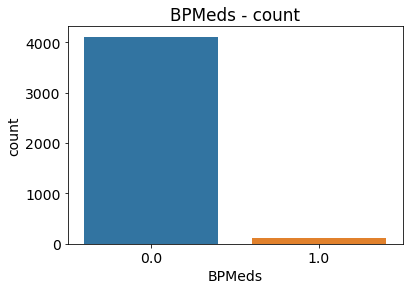

In [50]:
sns.countplot(x = 'BPMeds', data = df)
plt.title('BPMeds - count')

In [51]:
ct_BPMeds = pd.crosstab(df.BPMeds, df.TenYearCHD)
ct_BPMeds

TenYearCHD,0,1
BPMeds,,
0.0,3511,603
1.0,83,41


In [52]:
chi2_contingency(ct_BPMeds, correction = False)

(31.649053344312318,
 1.8470461189725918e-08,
 1,
 array([[3488.8428504,  625.1571496],
        [ 105.1571496,   18.8428504]]))

Text(0.5, 1.0, 'BPMeds VS  TenYearCHD')

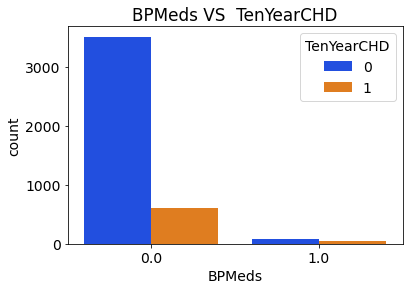

In [53]:
sns.countplot(df.BPMeds, hue = df.TenYearCHD, palette = 'bright')
plt.title('BPMeds VS  TenYearCHD')

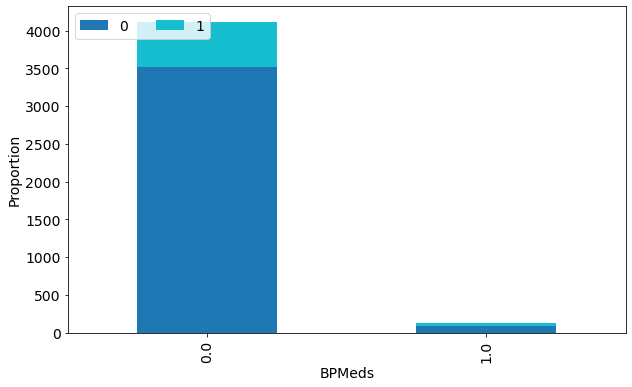

In [54]:
ct_BPMeds.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("BPMeds")
plt.ylabel("Proportion")
plt.show()
#good predictor

# prevalentStroke-Status of patient stroke history

In [55]:
df.prevalentStroke.describe()

count    4238.000000
mean        0.005899
std         0.076587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64

In [56]:
df.prevalentStroke.isnull().sum()

0

Text(0.5, 1.0, 'prevalentStroke - count')

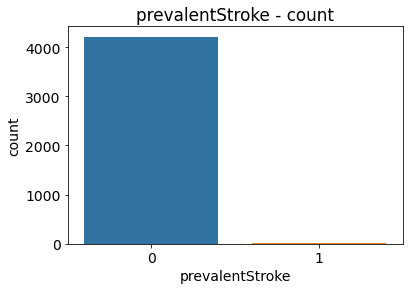

In [57]:
sns.countplot(x = 'prevalentStroke', data = df)
plt.title('prevalentStroke - count')

In [58]:
ct_prevalentStroke = pd.crosstab(df.prevalentStroke, df.TenYearCHD)
ct_prevalentStroke

TenYearCHD,0,1
prevalentStroke,,
0,3580,633
1,14,11


In [59]:
chi2_contingency(ct_prevalentStroke, correction = False)

(16.191149461946694,
 5.726102177501766e-05,
 1,
 array([[3572.79896177,  640.20103823],
        [  21.20103823,    3.79896177]]))

Text(0.5, 1.0, 'prevalentStroke VS  TenYearCHD')

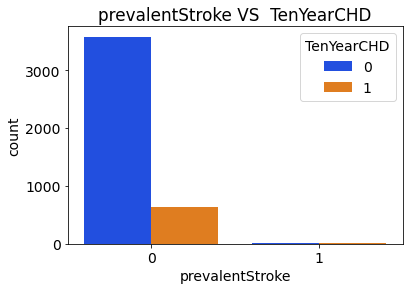

In [60]:
sns.countplot(df.prevalentStroke, hue = df.TenYearCHD, palette = 'bright')
plt.title('prevalentStroke VS  TenYearCHD')

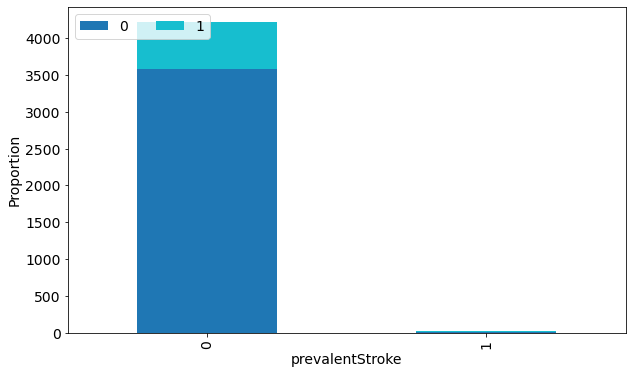

In [61]:
ct_prevalentStroke.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("prevalentStroke")
plt.ylabel("Proportion")
plt.show()
#good predictor

# prevalentHyp-Status of patient hypertension history

In [62]:
df.prevalentHyp.describe()

count    4238.000000
mean        0.310524
std         0.462763
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64

In [63]:
df.prevalentHyp.isnull().sum()

0

Text(0.5, 1.0, 'prevalentHyp - count')

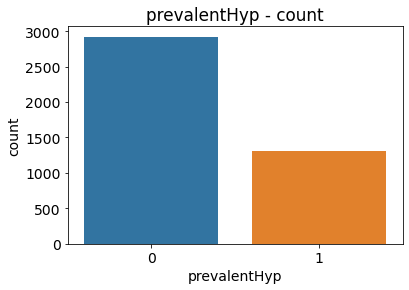

In [64]:
sns.countplot(x = 'prevalentHyp', data = df)
plt.title('prevalentHyp - count')

In [65]:
ct_prevalentHyp = pd.crosstab(df.prevalentHyp, df.TenYearCHD)
ct_prevalentHyp

TenYearCHD,0,1
prevalentHyp,,
0,2603,319
1,991,325


In [66]:
chi2_contingency(ct_prevalentHyp, correction = False)

(133.6780899180762,
 6.425269735903649e-31,
 1,
 array([[2477.97734781,  444.02265219],
        [1116.02265219,  199.97734781]]))

Text(0.5, 1.0, 'prevalentHyp VS  TenYearCHD')

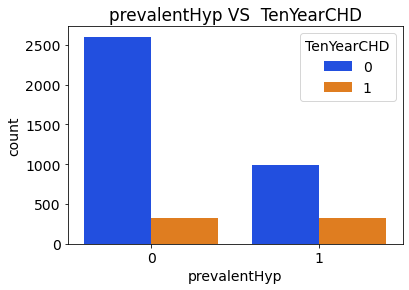

In [67]:
sns.countplot(df.prevalentHyp, hue = df.TenYearCHD, palette = 'bright')
plt.title('prevalentHyp VS  TenYearCHD')

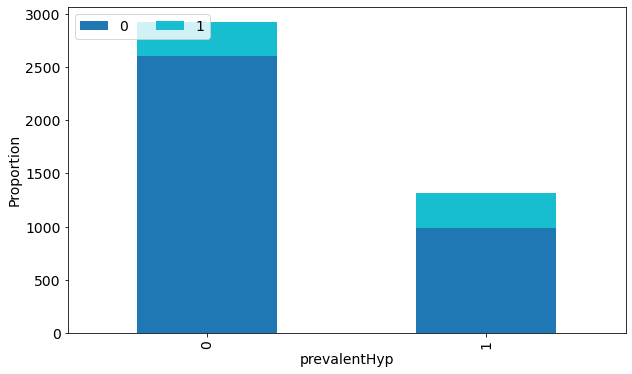

In [68]:
ct_prevalentHyp.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("prevalentHyp")
plt.ylabel("Proportion")
plt.show()
#good predictor

# diabetes-Status of patient diabetes history

In [69]:
df.diabetes.describe()

count    4238.000000
mean        0.025720
std         0.158316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64

In [70]:
df.diabetes.isnull().sum()

0

Text(0.5, 1.0, 'diabetes - count')

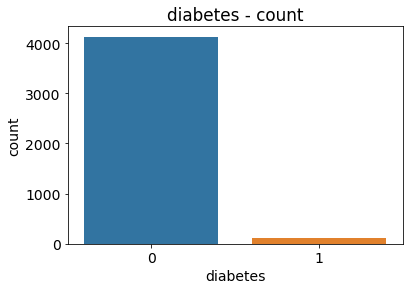

In [71]:
sns.countplot(x = 'diabetes', data = df)
plt.title('diabetes - count')

In [72]:
ct_diabetes = pd.crosstab(df.diabetes, df.TenYearCHD)
ct_diabetes

TenYearCHD,0,1
diabetes,,
0,3525,604
1,69,40


In [73]:
chi2_contingency(ct_diabetes, correction = False)

(40.135995000258504,
 2.368836764784068e-10,
 1,
 array([[3501.56347334,  627.43652666],
        [  92.43652666,   16.56347334]]))

Text(0.5, 1.0, 'diabetes VS  TenYearCHD')

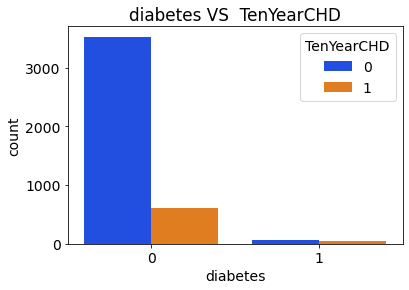

In [74]:
sns.countplot(df.diabetes, hue = df.TenYearCHD, palette = 'bright')
plt.title('diabetes VS  TenYearCHD')

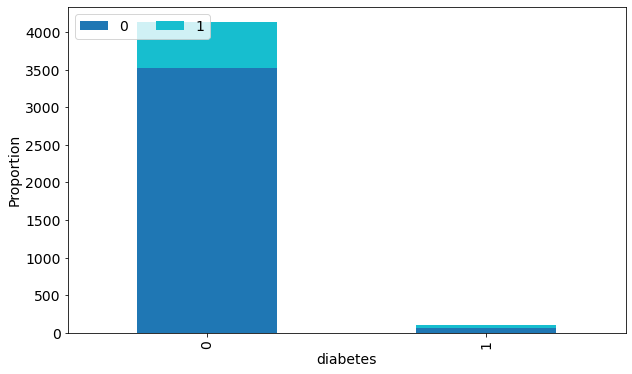

In [75]:
ct_diabetes.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("diabetes")
plt.ylabel("Proportion")
plt.show()
#good predictor

# totChol

In [76]:
df.totChol.describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [77]:
df.totChol.isnull().sum()

50

In [78]:
df.totChol.fillna(df.totChol.median(),inplace=True)

In [79]:
df.totChol.isnull().sum()

0

Skewness: 0.878718
Kurtosis: 4.218585


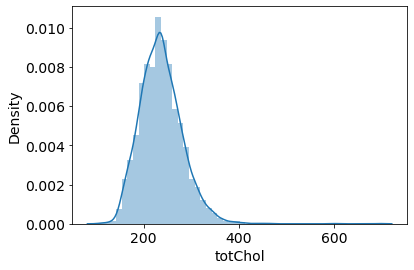

In [80]:
sns.distplot(df['totChol']);

print("Skewness: %f" % df['totChol'].skew())
print("Kurtosis: %f" % df['totChol'].kurt())
#totChol Data is not normaly Distributed  kurtosis value not in the normality range.

In [81]:
df['totChol_log']=np.log(df['totChol'])

Skewness: 0.007629
Kurtosis: 0.505446


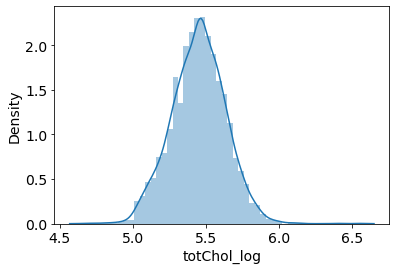

In [82]:
sns.distplot(df['totChol_log']);

print("Skewness: %f" % df['totChol_log'].skew())
print("Kurtosis: %f" % df['totChol_log'].kurt())
#totChol_log Data is normaly Distributed skewness and kurtosis are also in the normality range.

In [83]:
df.drop('totChol',axis=1,inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
 15  totChol_log      4238 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<AxesSubplot:xlabel='totChol_log'>

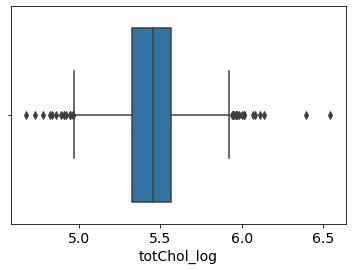

In [85]:
sns.boxplot(df.totChol_log)

In [86]:
IQR=df.totChol_log.quantile(0.75)-df.totChol_log.quantile(0.25)
IQR

0.24046833497151532

In [87]:
UL=df.totChol_log.quantile(0.75)+IQR*1.5
UL

5.9290470062183696

In [88]:
LL=df.totChol_log.quantile(0.25)-IQR*1.5
LL

4.967173666332308

In [89]:
df.loc[df['totChol_log']>=5.9290470062183696,'totChol_log']=5.9290470062183696

In [90]:
df.loc[df['totChol_log']<=4.967173666332308,'totChol_log']=4.967173666332308

<AxesSubplot:xlabel='totChol_log'>

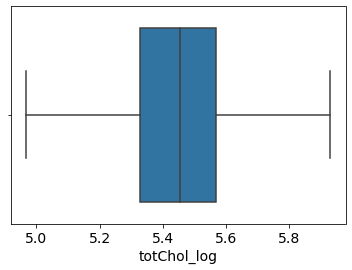

In [91]:
sns.boxplot(df.totChol_log)

In [92]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ totChol_log', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#2.747358e-07 ie p_value is <0.05; Ho Reject; Good Predictor

                 df      sum_sq   mean_sq          F        PR(>F)
totChol_log     1.0    3.396026  3.396026  26.505315  2.747358e-07
Residual     4236.0  542.742719  0.128126        NaN           NaN


# sysBP

In [93]:
df.sysBP.describe()

count    4238.000000
mean      132.352407
std        22.038097
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

In [94]:
df.sysBP.isnull().sum()

0

Skewness: 1.145362
Kurtosis: 2.155019


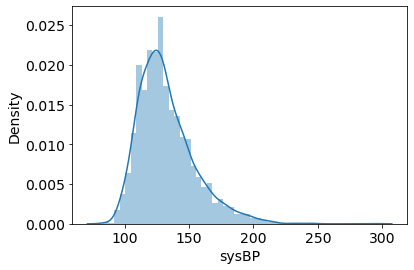

In [95]:
sns.distplot(df['sysBP']);

print("Skewness: %f" % df['sysBP'].skew())
print("Kurtosis: %f" % df['sysBP'].kurt())
#sysBP Data is normaly Distributed skewness and kurtosis are also in the normality range.

<AxesSubplot:xlabel='sysBP'>

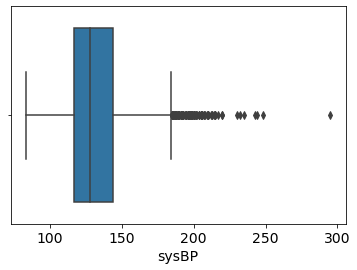

In [96]:
sns.boxplot(df.sysBP)

In [97]:
IQR=df.sysBP.quantile(0.75)-df.sysBP.quantile(0.25)
IQR

27.0

In [98]:
UL=df.sysBP.quantile(0.75)+1.5*IQR
UL

184.5

In [99]:
df.loc[df['sysBP']>=184.5,'sysBP']=184.5

<AxesSubplot:xlabel='sysBP'>

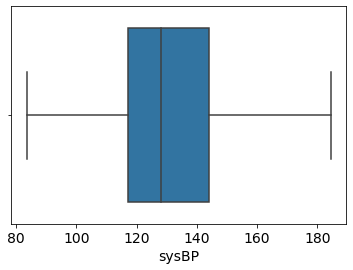

In [100]:
sns.boxplot(df.sysBP)

In [101]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ sysBP', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#2.542410e-43 ie p_value is <0.05; Ho Reject; Good Predictor

              df      sum_sq    mean_sq           F        PR(>F)
sysBP        1.0   24.012644  24.012644  194.814161  2.542410e-43
Residual  4236.0  522.126101   0.123259         NaN           NaN


# diaBP

In [102]:
df.diaBP.describe()

count    4238.000000
mean       82.893464
std        11.910850
min        48.000000
25%        75.000000
50%        82.000000
75%        89.875000
max       142.500000
Name: diaBP, dtype: float64

In [103]:
df.diaBP.isnull().sum()

0

Skewness: 0.714102
Kurtosis: 1.277100


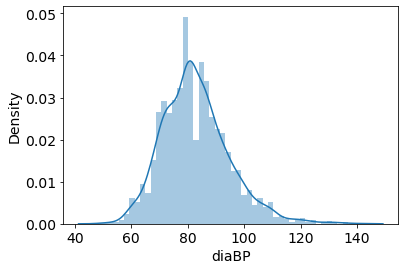

In [104]:
sns.distplot(df['diaBP']);

print("Skewness: %f" % df['diaBP'].skew())
print("Kurtosis: %f" % df['diaBP'].kurt())
#diaBP Data is normaly Distributed skewness and kurtosis are also in the normality range.

<AxesSubplot:xlabel='diaBP'>

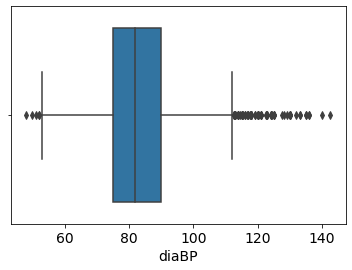

In [105]:
sns.boxplot(df.diaBP)

In [106]:
IQR=df.diaBP.quantile(0.75)-df.diaBP.quantile(0.25)
IQR

14.875

In [107]:
UL=df.diaBP.quantile(0.75)+1.5*IQR
UL

112.1875

In [108]:
LL=df.diaBP.quantile(0.25)-1.5*IQR
LL

52.6875

In [109]:
df.loc[df['diaBP']>=112.1875,'diaBP']=112.1875

In [110]:
df.loc[df['diaBP']<=52.6875,'diaBP']=52.6875

<AxesSubplot:xlabel='diaBP'>

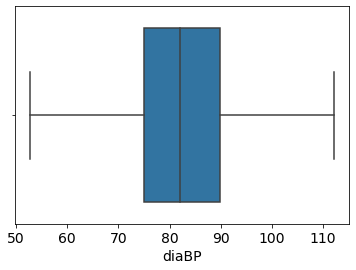

In [111]:
sns.boxplot(df.diaBP)

In [112]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ diaBP', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#4.014340e-20 ie p_value is <0.05; Ho Reject; Good Predictor

              df      sum_sq    mean_sq          F        PR(>F)
diaBP        1.0   10.776771  10.776771  85.270161  4.014340e-20
Residual  4236.0  535.361974   0.126384        NaN           NaN


# BMI

In [113]:
df.BMI.describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [114]:
df.BMI.isnull().sum()

19

In [115]:
df.BMI.fillna(df.BMI.median(),inplace=True)

In [116]:
df.BMI.isnull().sum()

0

Skewness: 0.985442
Kurtosis: 2.683554


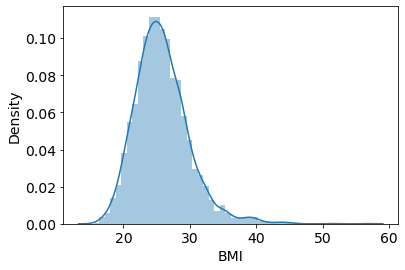

In [117]:
sns.distplot(df['BMI']);

print("Skewness: %f" % df['BMI'].skew())
print("Kurtosis: %f" % df['BMI'].kurt())
#BMI Data is normaly Distributed skewness and kurtosis are also in the normality range.

<AxesSubplot:xlabel='BMI'>

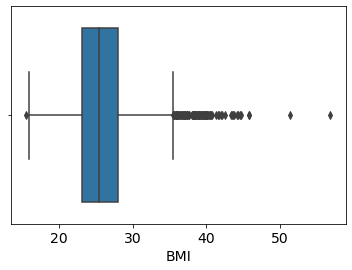

In [118]:
sns.boxplot(df.BMI)

In [119]:
IQR=df.BMI.quantile(0.75)-df.BMI.quantile(0.25)
IQR

4.957500000000003

In [120]:
UL=df.BMI.quantile(0.75)+1.5*IQR
UL

35.47375000000001

In [121]:
LL=df.BMI.quantile(0.25)-1.5*IQR
LL

15.643749999999994

In [122]:
df.loc[df['BMI']>=35.47375000000001,'BMI']=35.47375000000001

In [123]:
df.loc[df['BMI']<=15.643749999999994,'BMI']=15.643749999999994

<AxesSubplot:xlabel='BMI'>

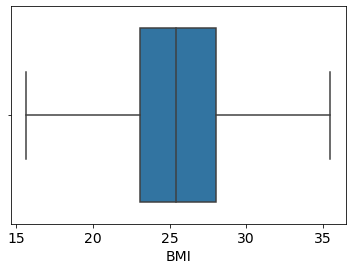

In [124]:
sns.boxplot(df.BMI)

In [125]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ BMI', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#0.000003 ie p_value is <0.05; Ho Reject; Good Predictor

              df      sum_sq   mean_sq          F    PR(>F)
BMI          1.0    2.771987  2.771987  21.609969  0.000003
Residual  4236.0  543.366757  0.128274        NaN       NaN


# heartRate

In [126]:
df.heartRate.describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [127]:
df.heartRate.isnull().sum()

1

In [128]:
df.heartRate.fillna(df.heartRate.median(),inplace=True)

In [129]:
df.heartRate.isnull().sum()

0

Skewness: 0.644608
Kurtosis: 0.908440


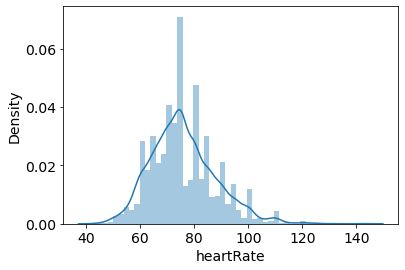

In [130]:
sns.distplot(df['heartRate']);

print("Skewness: %f" % df['heartRate'].skew())
print("Kurtosis: %f" % df['heartRate'].kurt())
#heartRate Data is normaly Distributed skewness and kurtosis are also in the normality range.

<AxesSubplot:xlabel='heartRate'>

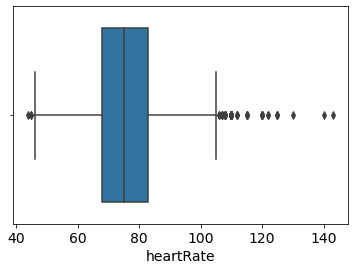

In [131]:
sns.boxplot(df.heartRate)

In [132]:
IQR=df.heartRate.quantile(0.75)-df.heartRate.quantile(0.25)
IQR

15.0

In [133]:
UL=df.heartRate.quantile(0.75)+IQR*1.5
UL

105.5

In [134]:
LL=df.heartRate.quantile(0.25)-IQR*1.5
LL

45.5

In [135]:
df.loc[df['heartRate']>=105.5,'heartRate']=105.5

In [136]:
df.loc[df['heartRate']<=45.5,'heartRate']=45.5

<AxesSubplot:xlabel='heartRate'>

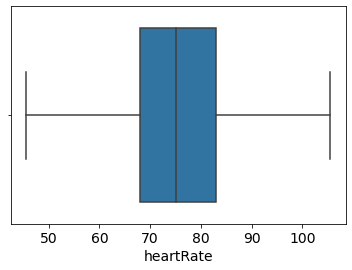

In [137]:
sns.boxplot(df.heartRate)

In [138]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ heartRate', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#heartRate ie p_value is >0.05; Ho Accept; Bad Predictor

               df      sum_sq   mean_sq         F    PR(>F)
heartRate     1.0    0.284592  0.284592  2.208525  0.137324
Residual   4236.0  545.854153  0.128861       NaN       NaN


# glucose

In [139]:
df.glucose.describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [140]:
df.glucose.isnull().sum()

388

In [141]:
df.glucose.fillna(df.glucose.median(),inplace=True)

In [142]:
df.glucose.isnull().sum()

0

Skewness: 6.541476
Kurtosis: 64.957182


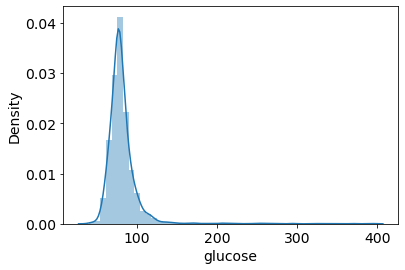

In [143]:
sns.distplot(df['glucose']);

print("Skewness: %f" % df['glucose'].skew())
print("Kurtosis: %f" % df['glucose'].kurt())
#glucose Data is not normaly Distributed skewness and kurtosis are ou of the normality range.

In [144]:
df['glucose_log']=np.log(df['glucose'])

Skewness: 2.389870
Kurtosis: 13.596579


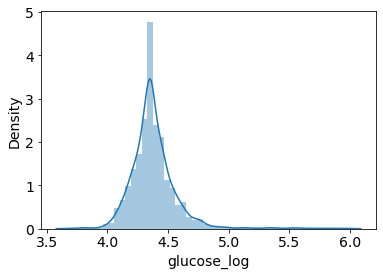

In [145]:
sns.distplot(df['glucose_log']);

print("Skewness: %f" % df['glucose_log'].skew())
print("Kurtosis: %f" % df['glucose_log'].kurt())
#glucose_log Data is normaly Distributed skewness and kurtosis are also in the normality range.

In [146]:
df['glucose_reciprocal']=1/df.glucose

Skewness: -0.320455
Kurtosis: 3.461930


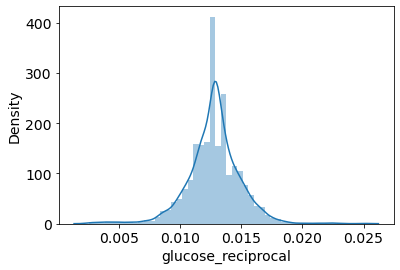

In [147]:
sns.distplot(df['glucose_reciprocal']);

print("Skewness: %f" % df['glucose_reciprocal'].skew())
print("Kurtosis: %f" % df['glucose_reciprocal'].kurt())
#glucose_reciprocal Data is normaly Distributed skewness and kurtosis are also in the normality range.

In [148]:
from matplotlib import pylab
from pylab import *

In [149]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

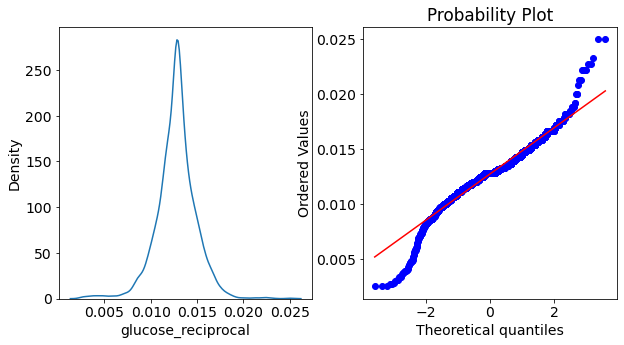

In [150]:
normality(df,'glucose_reciprocal')

we will consider reciprocal transformation


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4238 non-null   int64  
 1   age                 4238 non-null   int64  
 2   education           4238 non-null   float64
 3   currentSmoker       4238 non-null   int64  
 4   cigsPerDay          4238 non-null   float64
 5   BPMeds              4238 non-null   float64
 6   prevalentStroke     4238 non-null   int64  
 7   prevalentHyp        4238 non-null   int64  
 8   diabetes            4238 non-null   int64  
 9   sysBP               4238 non-null   float64
 10  diaBP               4238 non-null   float64
 11  BMI                 4238 non-null   float64
 12  heartRate           4238 non-null   float64
 13  glucose             4238 non-null   float64
 14  TenYearCHD          4238 non-null   int64  
 15  totChol_log         4238 non-null   float64
 16  glucos

In [152]:
df.drop(['glucose','glucose_log'],axis=1,inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4238 non-null   int64  
 1   age                 4238 non-null   int64  
 2   education           4238 non-null   float64
 3   currentSmoker       4238 non-null   int64  
 4   cigsPerDay          4238 non-null   float64
 5   BPMeds              4238 non-null   float64
 6   prevalentStroke     4238 non-null   int64  
 7   prevalentHyp        4238 non-null   int64  
 8   diabetes            4238 non-null   int64  
 9   sysBP               4238 non-null   float64
 10  diaBP               4238 non-null   float64
 11  BMI                 4238 non-null   float64
 12  heartRate           4238 non-null   float64
 13  TenYearCHD          4238 non-null   int64  
 14  totChol_log         4238 non-null   float64
 15  glucose_reciprocal  4238 non-null   float64
dtypes: flo

In [154]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('TenYearCHD ~ glucose_reciprocal', data = df).fit()
aov_table = sm.stats.anova_lm(mod, type = 2)
print(aov_table)
#glucose_reciprocal  ie p_value is <0.05; Ho Reject; Good Predictor

                        df      sum_sq   mean_sq          F        PR(>F)
glucose_reciprocal     1.0    3.494617  3.494617  27.279756  1.844975e-07
Residual            4236.0  542.644127  0.128103        NaN           NaN


# TenYearCHD

In [155]:
df.TenYearCHD.describe()

count    4238.000000
mean        0.151958
std         0.359023
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [156]:
df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [157]:
df.TenYearCHD.isnull().sum()

0

Text(0.5, 1.0, 'TenYearCHD - count')

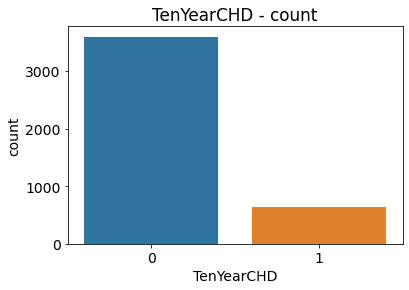

In [158]:
sns.countplot(x = 'TenYearCHD', data = df)
plt.title('TenYearCHD - count')

# Model-1

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4238 non-null   int64  
 1   age                 4238 non-null   int64  
 2   education           4238 non-null   float64
 3   currentSmoker       4238 non-null   int64  
 4   cigsPerDay          4238 non-null   float64
 5   BPMeds              4238 non-null   float64
 6   prevalentStroke     4238 non-null   int64  
 7   prevalentHyp        4238 non-null   int64  
 8   diabetes            4238 non-null   int64  
 9   sysBP               4238 non-null   float64
 10  diaBP               4238 non-null   float64
 11  BMI                 4238 non-null   float64
 12  heartRate           4238 non-null   float64
 13  TenYearCHD          4238 non-null   int64  
 14  totChol_log         4238 non-null   float64
 15  glucose_reciprocal  4238 non-null   float64
dtypes: flo

In [160]:
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
x=df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,14,15]]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4238 non-null   int64  
 1   age                 4238 non-null   int64  
 2   education           4238 non-null   float64
 3   cigsPerDay          4238 non-null   float64
 4   BPMeds              4238 non-null   float64
 5   prevalentStroke     4238 non-null   int64  
 6   prevalentHyp        4238 non-null   int64  
 7   diabetes            4238 non-null   int64  
 8   sysBP               4238 non-null   float64
 9   diaBP               4238 non-null   float64
 10  BMI                 4238 non-null   float64
 11  totChol_log         4238 non-null   float64
 12  glucose_reciprocal  4238 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 430.5 KB


In [162]:
y=df.iloc[:,13]
y.head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: TenYearCHD, dtype: int64

In [163]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [164]:
model1.intercept_

array([-1.71937616])

In [165]:
model1.coef_

array([[ 0.42016206,  0.06053463, -0.03391511,  0.02085368,  0.3269933 ,
         0.81880598,  0.36787514,  0.7615195 ,  0.0146309 , -0.00789883,
        -0.00580686, -0.87830958, -0.05955757]])

In [166]:
#Predictions
y_pred = model1.predict(x)

In [167]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[3572   22]
 [ 606   38]]


In [168]:
#Accuracy Score - correct predictions / total number of data points
model1.score(x,y)#0.85181689476168

0.85181689476168

In [169]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model1.predict_proba(x)
fpr, tpr, thresholds =roc_curve(df["TenYearCHD"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 0.74911
print(roc_auc)

0.7235104573875714


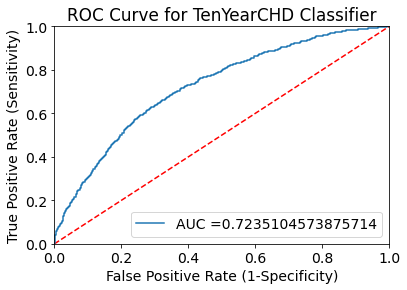

In [170]:
#ROC Curve
plt.title('ROC Curve for TenYearCHD Classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [171]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3594
           1       0.63      0.06      0.11       644

    accuracy                           0.85      4238
   macro avg       0.74      0.53      0.51      4238
weighted avg       0.82      0.85      0.80      4238



# Model2

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

## Predicting the test set results and calculating the accuracy

In [176]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


## Confusion Matrix

In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1067    7]
 [ 189    9]]


In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1074
           1       0.56      0.05      0.08       198

    accuracy                           0.85      1272
   macro avg       0.71      0.52      0.50      1272
weighted avg       0.80      0.85      0.79      1272



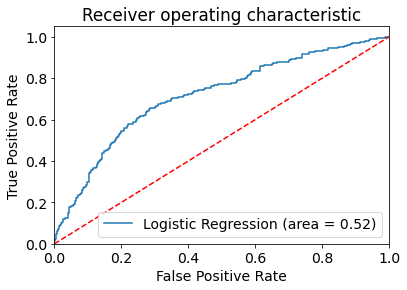

In [179]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model3

In [192]:
df2=pd.DataFrame(df)

In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4238 non-null   int64  
 1   age                 4238 non-null   int64  
 2   education           4238 non-null   float64
 3   currentSmoker       4238 non-null   int64  
 4   cigsPerDay          4238 non-null   float64
 5   BPMeds              4238 non-null   float64
 6   prevalentStroke     4238 non-null   int64  
 7   prevalentHyp        4238 non-null   int64  
 8   diabetes            4238 non-null   int64  
 9   sysBP               4238 non-null   float64
 10  diaBP               4238 non-null   float64
 11  BMI                 4238 non-null   float64
 12  heartRate           4238 non-null   float64
 13  TenYearCHD          4238 non-null   int64  
 14  totChol_log         4238 non-null   float64
 15  glucose_reciprocal  4238 non-null   float64
dtypes: flo

In [203]:
df2.drop(['heartRate','currentSmoker'],axis=1,inplace=True)

In [204]:
x=df2.iloc[:,df2.columns!='TenYearCHD']

In [205]:
y=df2.iloc[:,df2.columns=='TenYearCHD']

In [206]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4238 non-null   int64  
 1   age                 4238 non-null   int64  
 2   education           4238 non-null   float64
 3   cigsPerDay          4238 non-null   float64
 4   BPMeds              4238 non-null   float64
 5   prevalentStroke     4238 non-null   int64  
 6   prevalentHyp        4238 non-null   int64  
 7   diabetes            4238 non-null   int64  
 8   sysBP               4238 non-null   float64
 9   diaBP               4238 non-null   float64
 10  BMI                 4238 non-null   float64
 11  totChol_log         4238 non-null   float64
 12  glucose_reciprocal  4238 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 430.5 KB


In [207]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TenYearCHD  4238 non-null   int64
dtypes: int64(1)
memory usage: 33.2 KB


In [208]:
y.value_counts()

TenYearCHD
0             3594
1              644
dtype: int64

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [210]:
x_test.shape

(1272, 13)

In [211]:
x_train.shape

(2966, 13)

join horzontally x_train,y_train

In [212]:
train=x_train.join(y_train)

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2966 entries, 264 to 2732
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              2966 non-null   int64  
 1   age                 2966 non-null   int64  
 2   education           2966 non-null   float64
 3   cigsPerDay          2966 non-null   float64
 4   BPMeds              2966 non-null   float64
 5   prevalentStroke     2966 non-null   int64  
 6   prevalentHyp        2966 non-null   int64  
 7   diabetes            2966 non-null   int64  
 8   sysBP               2966 non-null   float64
 9   diaBP               2966 non-null   float64
 10  BMI                 2966 non-null   float64
 11  totChol_log         2966 non-null   float64
 12  glucose_reciprocal  2966 non-null   float64
 13  TenYearCHD          2966 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 412.1 KB


In [214]:
train.shape

(2966, 14)

In [215]:
no_chd=train[train.TenYearCHD==0]
len(no_chd)

2520

In [216]:
chd=train[train.TenYearCHD==1]
len(chd)

446

In [217]:
#upsample minority with replacement
from sklearn.utils import resample
chd_os=resample(chd,
              replace=True,
              n_samples=len(no_chd),
              random_state=27)

### Combine Vertically

In [218]:
train_os=pd.concat([no_chd,chd_os])

In [219]:
train_os.TenYearCHD.value_counts()

0    2520
1    2520
Name: TenYearCHD, dtype: int64

In [221]:
x_trainos=train_os.loc[:,train_os.columns != 'TenYearCHD']

In [222]:
y_trainos=train_os.loc[:,train_os.columns == 'TenYearCHD']

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [224]:
logreg = LogisticRegression()
logreg.fit(x_trainos, y_trainos)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [225]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


# confusion matrix

In [226]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[729 345]
 [ 66 132]]


In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1074
           1       0.28      0.67      0.39       198

    accuracy                           0.68      1272
   macro avg       0.60      0.67      0.59      1272
weighted avg       0.82      0.68      0.72      1272



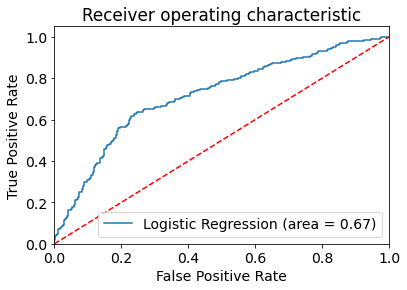

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [229]:
#model1 is giving good result